# XGBoost for Regression – Step-by-Step (CGPA vs Package)

## Dataset

| CGPA | Package |
|------|---------|
| 6.7  | 4.5     |
| 9.0  | 11.0    |
| 7.5  | 6.0     |
| 5.0  | 8.0     |

---

## Stage 1: Base Model (Mean Prediction)

Let base model prediction be the mean of target values (Package):

$$
\text{mean} = \frac{4.5 + 11.0 + 6.0 + 8.0}{4} = \frac{29.5}{4} = 7.375 \approx 7.3
$$

| CGPA | Package | Model 1 (mean) | Residual 1 |
|------|---------|----------------|------------|
| 6.7  | 4.5     | 7.3            | -2.8       |
| 9.0  | 11.0    | 7.3            | 3.7        |
| 7.5  | 6.0     | 7.3            | -1.3       |
| 5.0  | 8.0     | 7.3            | 0.7        |

---

## Similarity Score (Before Splitting)

All residuals in one leaf:

$$
\text{SS} = \frac{(-2.8 + 3.7 - 1.3 + 0.7)^2}{4 + \lambda}, \quad \lambda = 0
$$

$$
\text{SS} = \frac{(-0.7)^2}{4} = \frac{0.49}{4} = 0.1225
$$

---

## Finding Best Split (on CGPA)

Sorted CGPA: 5.0, 6.7, 7.5, 9.0  
Split points: **5.85, 7.1, 8.25**

### Split 1: CGPA < 5.85

Left: [0.7]  
Right: [-2.8, -1.3, 3.7]

$$
SS_L = \frac{(0.7)^2}{1} = 0.49
$$

$$
SS_R = \frac{(-2.8 -1.3 + 3.7)^2}{3} = \frac{(-0.4)^2}{3} = \frac{0.16}{3} = 0.0533
$$

$$
\text{Gain} = (SS_L + SS_R) - SS_{\text{root}} = 0.5433 - 0.1225 = -0.4208
$$

### Split 2: CGPA < 7.1

Left: [0.7, -2.8]  
Right: [-1.3, 3.7]

$$
SS_L = \frac{(0.7 - 2.8)^2}{2} = \frac{(-2.1)^2}{2} = \frac{4.41}{2} = 2.205
$$

$$
SS_R = \frac{(-1.3 + 3.7)^2}{2} = \frac{(2.4)^2}{2} = \frac{5.76}{2} = 2.88
$$

$$
\text{Gain} = 2.205 + 2.88 - 0.1225 = 4.9625
$$

**→ This is the best split so far.**

---

## Stage 2: Create Tree (First Decision Tree)

We split at **CGPA < 7.1**  
Now we compute output value at each leaf:

### Left Leaf: [0.7, -2.8]

$$
v_L = \frac{\sum \text{residuals}}{n + \lambda} = \frac{0.7 - 2.8}{2} = \frac{-2.1}{2} = -1.05
$$

### Right Leaf: [-1.3, 3.7]

$$
v_R = \frac{-1.3 + 3.7}{2} = \frac{2.4}{2} = 1.2
$$

---

## Stage 3: Model Update

Let learning rate $\eta = 0.3$  
Update prediction:

$$
\text{Model 2} = \text{Model 1} + \eta \cdot \text{tree output}
$$

| CGPA | Model 1 | Tree Output | Model 2 = M1 + 0.3*out | Residual 2 |
|------|---------|-------------|------------------------|-------------|
| 6.7  | 7.3     | -1.05       | 7.3 + (0.3 * -1.05) = 6.985 | 4.5 - 6.985 = -2.485 |
| 9.0  | 7.3     | 1.2         | 7.3 + (0.3 * 1.2) = 7.66    | 11.0 - 7.66 = 3.34   |
| 7.5  | 7.3     | 1.2         | 7.3 + (0.3 * 1.2) = 7.66    | 6.0 - 7.66 = -1.66   |
| 5.0  | 7.3     | -1.05       | 7.3 + (0.3 * -1.05) = 6.985 | 8.0 - 6.985 = 1.015  |

---



...

---

## Stage 4: Build Second Tree (Using CGPA vs Residual 2)

| CGPA | Residual 2 |
|------|------------|
| 6.7  | -2.485     |
| 9.0  | 3.34       |
| 7.5  | -1.66      |
| 5.0  | 1.015      |

### Step 1: Compute Root Node Similarity Score

$$
\text{Sum of residuals} = -2.485 + 3.34 - 1.66 + 1.015 = 0.21
$$

$$
SS_{\text{root}} = \frac{(0.21)^2}{4} = \frac{0.0441}{4} = 0.011025
$$

---

### Step 2: Find Split Points

Sorted CGPA: 5.0, 6.7, 7.5, 9.0  
→ Split points: 5.85, 7.1, 8.25

---

### Split at CGPA < 5.85

- Left: [1.015]
- Right: [-2.485, -1.66, 3.34]

$$
SS_L = \frac{(1.015)^2}{1} = 1.030225
$$

$$
SS_R = \frac{(-2.485 -1.66 + 3.34)^2}{3} = \frac{(-0.805)^2}{3} = \frac{0.6480}{3} = 0.216
$$

$$
\text{Gain} = 1.030225 + 0.216 - 0.011025 = 1.2352
$$

---

### Split at CGPA < 7.1

- Left: [1.015, -2.485]
- Right: [-1.66, 3.34]

$$
SS_L = \frac{(1.015 -2.485)^2}{2} = \frac{(-1.47)^2}{2} = \frac{2.1609}{2} = 1.08045
$$

$$
SS_R = \frac{(-1.66 + 3.34)^2}{2} = \frac{(1.68)^2}{2} = \frac{2.8224}{2} = 1.4112
$$

$$
\text{Gain} = 1.08045 + 1.4112 - 0.011025 = 2.480625
$$

**→ Best split so far**

---

### Split at CGPA < 8.25

- Left: [1.015, -2.485, -1.66]
- Right: [3.34]

$$
SS_L = \frac{(1.015 - 2.485 - 1.66)^2}{3} = \frac{(-3.13)^2}{3} = \frac{9.7969}{3} = 3.2656
$$

$$
SS_R = \frac{(3.34)^2}{1} = 11.1556
$$

$$
\text{Gain} = 3.2656 + 11.1556 - 0.011025 = 14.4102
$$

**→ This is the best split overall.**

---

## Final Tree (Stage 4)

Split: CGPA < 8.25  
- Left Leaf: [1.015, -2.485, -1.66] → Output:

$$
v_L = \frac{1.015 - 2.485 - 1.66}{3} = \frac{-3.13}{3} = -1.043
$$

- Right Leaf: [3.34] → Output:

$$
v_R = \frac{3.34}{1} = 3.34
$$

---

## Model Update (Stage 4)

Learning rate $\eta = 0.3$

| CGPA | Model 2 | Tree Output | Model 3 = M2 + 0.3*out | Residual 3 |
|------|---------|-------------|------------------------|-------------|
| 6.7  | 6.985   | -1.043      | 6.985 + 0.3*(-1.043) = 6.672 | 4.5 - 6.672 = -2.172 |
| 9.0  | 7.66    | 3.34        | 7.66 + 0.3*(3.34) = 8.662    | 11.0 - 8.662 = 2.338  |
| 7.5  | 7.66    | -1.043      | 7.66 + 0.3*(-1.043) = 7.347  | 6.0 - 7.347 = -1.347  |
| 5.0  | 6.985   | -1.043      | 6.985 + 0.3*(-1.043) = 6.672 | 8.0 - 6.672 = 1.328   |

---




## Recap: Residuals after Stage 4

| CGPA | Package | Model 3 | Residual 3 |
|------|---------|---------|------------|
| 6.7  | 4.5     | 6.672   | -2.172     |
| 9.0  | 11.0    | 8.662   | 2.338      |
| 7.5  | 6.0     | 7.347   | -1.347     |
| 5.0  | 8.0     | 6.672   | 1.328      |

---

## Stage 5: Build Tree from CGPA vs Residual 3

### Step 1: Compute Root Node Similarity Score

$$
\text{Sum of residuals} = -2.172 + 2.338 - 1.347 + 1.328 = 0.147
$$

$$
SS_{\text{root}} = \frac{(0.147)^2}{4} = \frac{0.0216}{4} = 0.0054
$$

---

### Step 2: Try all splits (CGPA cut points: 5.85, 7.1, 8.25)

### Split at CGPA < 5.85

- Left: [1.328]
- Right: [-2.172, -1.347, 2.338]

$$
SS_L = \frac{(1.328)^2}{1} = 1.7648
$$

$$
SS_R = \frac{(-2.172 -1.347 + 2.338)^2}{3} = \frac{(-1.181)^2}{3} = \frac{1.394}{3} = 0.4647
$$

$$
\text{Gain} = 1.7648 + 0.4647 - 0.0054 = 2.2241
$$

---

### Split at CGPA < 7.1

- Left: [1.328, -2.172]
- Right: [-1.347, 2.338]

$$
SS_L = \frac{(1.328 - 2.172)^2}{2} = \frac{(-0.844)^2}{2} = \frac{0.712}{2} = 0.356
$$

$$
SS_R = \frac{(-1.347 + 2.338)^2}{2} = \frac{(0.991)^2}{2} = \frac{0.982}{2} = 0.491

$$

$$
\text{Gain} = 0.356 + 0.491 - 0.0054 = 0.8416
$$

---

### Split at CGPA < 8.25

- Left: [1.328, -2.172, -1.347]
- Right: [2.338]

$$
SS_L = \frac{(1.328 -2.172 -1.347)^2}{3} = \frac{(-2.191)^2}{3} = \frac{4.800}{3} = 1.600
$$

$$
SS_R = \frac{(2.338)^2}{1} = 5.466

$$

$$
\text{Gain} = 1.600 + 5.466 - 0.0054 = 7.061
$$

**→ This is the best split!**

---

## Final Tree (Stage 5)

Split: CGPA < 8.25  
- Left Leaf: [1.328, -2.172, -1.347] → Output:

$$
v_L = \frac{1.328 -2.172 -1.347}{3} = \frac{-2.191}{3} = -0.730
$$

- Right Leaf: [2.338] → Output:

$$
v_R = \frac{2.338}{1} = 2.338
$$

---

## Model Update (Stage 5)

Learning rate $\eta = 0.3$

| CGPA | Model 3 | Tree Output | Model 4 = M3 + 0.3*out | Residual 4 |
|------|---------|-------------|-------------------------|-------------|
| 6.7  | 6.672   | -0.730      | 6.672 + 0.3*(-0.730) = 6.453 | 4.5 - 6.453 = -1.953 |
| 9.0  | 8.662   | 2.338       | 8.662 + 0.3*(2.338) = 9.363  | 11.0 - 9.363 = 1.637  |
| 7.5  | 7.347   | -0.730      | 7.347 + 0.3*(-0.730) = 7.128 | 6.0 - 7.128 = -1.128  |
| 5.0  | 6.672   | -0.730      | 6.672 + 0.3*(-0.730) = 6.453 | 8.0 - 6.453 = 1.547   |

---

## Final Results after Stage 5

| CGPA | Actual | Predicted (Model 4) | Final Residual |
|------|--------|---------------------|----------------|
| 6.7  | 4.5    | 6.453               | -1.953         |
| 9.0  | 11.0   | 9.363               | 1.637          |
| 7.5  | 6.0    | 7.128               | -1.128         |
| 5.0  | 8.0    | 6.453               | 1.547          |

---





## Residuals after Stage 5

| CGPA | Package | Model 4 | Residual 4 |
|------|---------|---------|------------|
| 6.7  | 4.5     | 6.453   | -1.953     |
| 9.0  | 11.0    | 9.363   | 1.637      |
| 7.5  | 6.0     | 7.128   | -1.128     |
| 5.0  | 8.0     | 6.453   | 1.547      |

---

## Stage 6: Tree on CGPA vs Residual 4

### Step 1: Compute Root Node Similarity Score

$$
\text{Sum of residuals} = -1.953 + 1.637 -1.128 + 1.547 = 0.103
$$

$$
SS_{\text{root}} = \frac{(0.103)^2}{4} = \frac{0.0106}{4} = 0.0027
$$

---

### Step 2: Try splits (CGPA cut points: 5.85, 7.1, 8.25)

### 🔹 Split at CGPA < 5.85

- Left: [1.547]
- Right: [-1.953, -1.128, 1.637]

$$
SS_L = \frac{(1.547)^2}{1} = 2.393
$$

$$
SS_R = \frac{(-1.953 -1.128 + 1.637)^2}{3} = \frac{(-1.444)^2}{3} = \frac{2.085}{3} = 0.695
$$

$$
\text{Gain} = 2.393 + 0.695 - 0.0027 = 3.085
$$

---

### 🔹 Split at CGPA < 7.1

- Left: [1.547, -1.953]
- Right: [-1.128, 1.637]

$$
SS_L = \frac{(1.547 -1.953)^2}{2} = \frac{(-0.406)^2}{2} = \frac{0.165)^2}{2} = 0.082
$$

$$
SS_R = \frac{(-1.128 + 1.637)^2}{2} = \frac{(0.509)^2}{2} = \frac{0.259)^2}{2} = 0.1295
$$

$$
\text{Gain} = 0.082 + 0.1295 - 0.0027 = 0.2088
$$

---

### 🔹 Split at CGPA < 8.25

- Left: [1.547, -1.953, -1.128]
- Right: [1.637]

$$
SS_L = \frac{(1.547 -1.953 -1.128)^2}{3} = \frac{(-1.534)^2}{3} = \frac{2.353)^2}{3} = 0.784
$$

$$
SS_R = \frac{(1.637)^2}{1} = 2.679
$$

$$
\text{Gain} = 0.784 + 2.679 - 0.0027 = 3.460
$$

✅ **Best Split: CGPA < 8.25**

---

## Final Tree – Stage 6

Split: CGPA < 8.25  
- Left Leaf: [1.547, -1.953, -1.128] → Output:

$$
v_L = \frac{1.547 -1.953 -1.128}{3} = \frac{-1.534}{3} = -0.511
$$

- Right Leaf: [1.637] → Output:

$$
v_R = \frac{1.637}{1} = 1.637
$$

---

## Update Model 4 to Model 5

Learning rate $\eta = 0.3$

| CGPA | Model 4 | Tree Output | Model 5 = M4 + 0.3*out | Residual 5 |
|------|---------|-------------|-------------------------|-------------|
| 6.7  | 6.453   | -0.511      | 6.453 + 0.3*(-0.511) = 6.299 | -1.799     |
| 9.0  | 9.363   | 1.637       | 9.363 + 0.3*(1.637) = 9.854  | 1.146      |
| 7.5  | 7.128   | -0.511      | 7.128 + 0.3*(-0.511) = 6.974 | -0.974     |
| 5.0  | 6.453   | -0.511      | 6.453 + 0.3*(-0.511) = 6.299 | 1.701      |

---

## Final Results After Stage 6

| CGPA | Actual | Predicted (Model 5) | Final Residual |
|------|--------|---------------------|----------------|
| 6.7  | 4.5    | 6.299               | -1.799         |
| 9.0  | 11.0   | 9.854               | 1.146          |
| 7.5  | 6.0    | 6.974               | -0.974         |
| 5.0  | 8.0    | 6.299               | 1.701          |

---



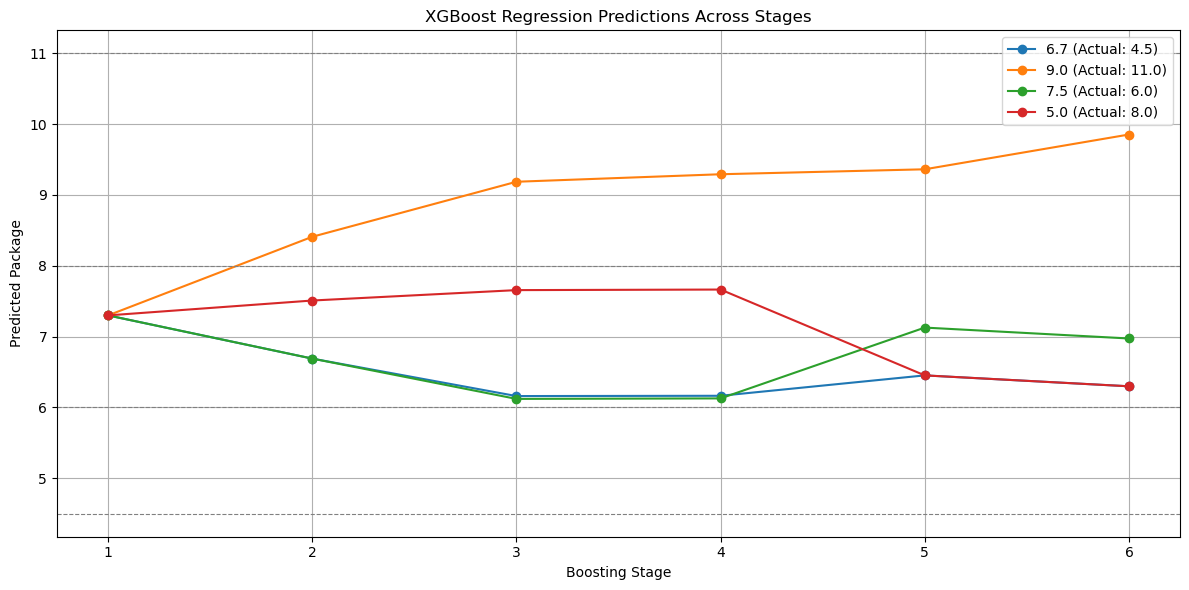

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Actual and predicted values after each stage
data = {
    'Stage': [1, 2, 3, 4, 5, 6],
    '6.7 (Actual: 4.5)': [7.3, 6.69, 6.161, 6.165, 6.453, 6.299],
    '9.0 (Actual: 11.0)': [7.3, 8.41, 9.187, 9.293, 9.363, 9.854],
    '7.5 (Actual: 6.0)': [7.3, 6.69, 6.121, 6.128, 7.128, 6.974],
    '5.0 (Actual: 8.0)': [7.3, 7.51, 7.657, 7.665, 6.453, 6.299]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
for column in df.columns[1:]:
    plt.plot(df['Stage'], df[column], marker='o', label=column)

# Add actual values as horizontal lines
actuals = {
    '6.7 (Actual: 4.5)': 4.5,
    '9.0 (Actual: 11.0)': 11.0,
    '7.5 (Actual: 6.0)': 6.0,
    '5.0 (Actual: 8.0)': 8.0
}
for label, value in actuals.items():
    plt.axhline(y=value, linestyle='--', color='gray', linewidth=0.8)

plt.title("XGBoost Regression Predictions Across Stages")
plt.xlabel("Boosting Stage")
plt.ylabel("Predicted Package")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost Regression: Visualization of Stage-wise Predictions

The following plot shows how the XGBoost model predictions evolve across each boosting stage for different CGPA values.

- The **dashed lines** represent the actual package values (ground truth).
- The **colored lines** show how predictions gradually move toward the actual values over the boosting stages (from **Stage 1 to Stage 6**).

This visualization helps us understand how XGBoost incrementally reduces the error by sequentially learning from residuals and refining the prediction tree by tree.

> 📉 The gap between each stage's prediction and the dashed line shows the residual error at that point.
> 📈 As we move to higher stages, this gap keeps decreasing — representing XGBoost's additive learning power.

> ✅ The model starts with a constant prediction (mean) and converges closer to the actual package values step by step.
